In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load results

In [2]:
# Dictionary to store results
results_dict = {
    'Census': {'prefix': 'census'},
    'News': {'prefix': 'news'},
    'Bankruptcy': {'prefix': 'bankruptcy'},
    'Marketing': {'prefix': 'bank'},
    'Marketing (Baseline)': {'prefix': 'bank_baseline'},
    'Marketing (Marginal)': {'prefix': 'bank_marginal'}
}

In [3]:
for key in results_dict:
    with open('../results/{}_catchup.pkl'.format(results_dict[key]['prefix']), 'rb') as f:
        results_dict[key]['catchup_results'] = pickle.load(f)

# Make plot

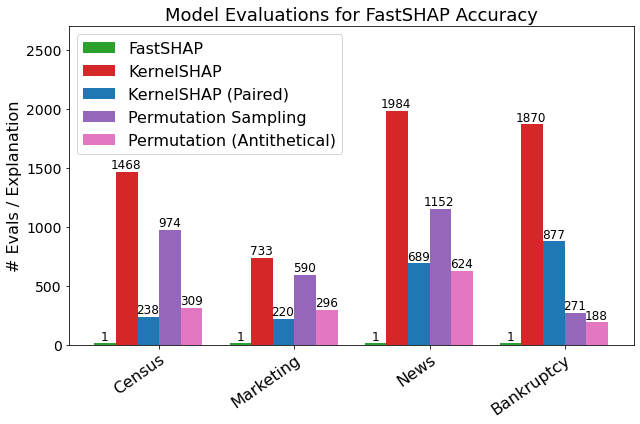

In [10]:
# Set FastSHAP value
for key in results_dict:        
    results_dict[key]['catchup_results']['FastSHAP'] = 10

plt.figure(figsize=(9, 6))

# Setup
width = 0.8
datasets = ['Census', 'Marketing', 'News', 'Bankruptcy']
methods = [
    {'name': 'FastSHAP', 'longname': 'FastSHAP', 'color': 'tab:green'},
    {'name': 'KernelSHAP', 'longname': 'KernelSHAP', 'color': 'tab:red'},
    {'name': 'KernelSHAP (Paired)', 'longname': 'KernelSHAP (Paired)', 'color': 'tab:blue'},
    {'name': 'Permutation Sampling', 'longname': 'Permutation Sampling', 'color': 'tab:purple'},
    {'name': 'Permutation (Antithetical)', 'longname': 'Permutation Sampling (Antithetical)', 'color': 'tab:pink'}]
ax = plt.gca()

for i, method in enumerate(methods):
    # Bar chart
    results = [results_dict[dataset]['catchup_results'][method['longname']] for dataset in datasets]
    plt.bar(np.arange(len(datasets)) + (i - len(methods) / 2) * width / len(methods),
            results, width / len(methods), color=method['color'], label=method['name'])
    
    # Annotations
    for j in range(len(datasets)):
        # Determine adjustments
        if results[j] >= 1000:
            h_adjustment = 0.12
        elif results[j] >= 100:
            h_adjustment = 0.089
        else:
            h_adjustment = 0.03
        v_adjustment = 30
        
        # Draw label
        ax.text(j + (i - len(methods) / 2) * width / len(methods) - h_adjustment,
                results[j] + v_adjustment,
                '{:.0f}'.format(results[j] if results[j] > 30 else 1),
                fontsize=12)

# Labels
plt.tick_params(labelsize=14)
plt.legend(loc='upper left', fontsize=16)
plt.ylabel('# Evals / Explanation', fontsize=16)
plt.title('Model Evaluations for FastSHAP Accuracy', fontsize=18)
plt.xticks(np.arange(len(datasets)), datasets, rotation=35, ha='right',
           rotation_mode='anchor', fontsize=16)
plt.ylim(0, 2700)

plt.tight_layout()
# plt.show()
plt.savefig('../figures/catchup.pdf')

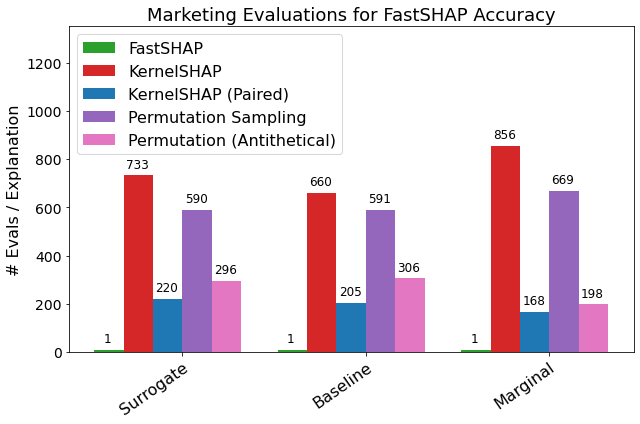

In [9]:
# Set FastSHAP value
for key in results_dict:        
    results_dict[key]['catchup_results']['FastSHAP'] = 10

plt.figure(figsize=(9, 6))

# Setup
width = 0.8
datasets = ['Marketing', 'Marketing (Baseline)', 'Marketing (Marginal)']
methods = [
    {'name': 'FastSHAP', 'longname': 'FastSHAP', 'color': 'tab:green'},
    {'name': 'KernelSHAP', 'longname': 'KernelSHAP', 'color': 'tab:red'},
    {'name': 'KernelSHAP (Paired)', 'longname': 'KernelSHAP (Paired)', 'color': 'tab:blue'},
    {'name': 'Permutation Sampling', 'longname': 'Permutation Sampling', 'color': 'tab:purple'},
    {'name': 'Permutation (Antithetical)', 'longname': 'Permutation Sampling (Antithetical)', 'color': 'tab:pink'}]
ax = plt.gca()

for i, method in enumerate(methods):
    # Bar chart
    results = [results_dict[dataset]['catchup_results'][method['longname']] for dataset in datasets]
    plt.bar(np.arange(len(datasets)) + (i - len(methods) / 2) * width / len(methods),
            results, width / len(methods), color=method['color'], label=method['name'])
    
    # Annotations
    for j in range(len(datasets)):
        # Determine adjustments
        if results[j] >= 1000:
            h_adjustment = 0.12
        elif results[j] >= 100:
            h_adjustment = 0.067
        else:
            h_adjustment = 0.03
        v_adjustment = 30
        
        # Draw label
        ax.text(j + (i - len(methods) / 2) * width / len(methods) - h_adjustment,
                results[j] + v_adjustment,
                '{:.0f}'.format(results[j] if results[j] > 30 else 1),
                fontsize=12)

# Labels
plt.tick_params(labelsize=14)
plt.legend(loc='upper left', fontsize=16)
plt.ylabel('# Evals / Explanation', fontsize=16)
plt.title('Marketing Evaluations for FastSHAP Accuracy', fontsize=18)
plt.xticks(np.arange(len(datasets)),
           # datasets,
           ['Surrogate', 'Baseline', 'Marginal'],
           rotation=35, ha='right',
           rotation_mode='anchor', fontsize=16)
plt.ylim(0, 1350)

plt.tight_layout()
# plt.show()
plt.savefig('../figures/catchup_bank.pdf')